<h1 align="center"> Registration Errors: A Visualization</h1>

This notebook is a demonstration of the three common registration errors: fiducial localization error (FLE), fiducial registration error (FRE), and target registration error (TRE). The goal is to clear up the misconception that FRE is a good approximation for TRE.

First, some important definitions:

**Fiducial Localization Error**: The error of the localization of the fiducials from the real locations in space

**Fiducial Registration Error**: The error of the fiducial markers following registration

**Target Registration Error**: The error of the target area/markers following registration

In [1]:
import SimpleITK as sitk
%matplotlib nbagg
from utilities import PairedPointDataManipulation, display_errors, registration_errors
import matplotlib.pyplot as plt
fixed_fiducials = [(48.62651209677419, 70.26515151515152), (51.8523185483871, 70.26515151515152), (54.594254032258064, 70.26515151515152), (57.49747983870968, 70.26515151515152), (61.36844758064517, 70.26515151515152), (64.91683467741936, 69.18290043290044), (67.98135080645162, 67.66774891774892), (72.01360887096774, 65.28679653679654), (75.078125, 62.90584415584416), (77.33618951612904, 58.79329004329005), (78.62651209677419, 56.62878787878788), (79.11038306451613, 52.9491341991342), (78.94909274193549, 51.433982683982684), (76.8523185483871, 48.40367965367965), (75.4007056451613, 46.455627705627705), (73.94909274193549, 45.15692640692641), (67.49747983870968, 41.044372294372295), (63.78780241935485, 39.52922077922078), (57.981350806451616, 38.01406926406926), (52.174899193548384, 37.1482683982684), (45.72328629032258, 36.71536796536797), (41.69102822580645, 36.71536796536797), (37.336189516129025, 36.93181818181818), (33.3039314516129, 38.663419913419915), (29.59425403225806, 43.425324675324674), (28.787802419354836, 44.94047619047619), (26.852318548387093, 49.26948051948052), (27.01360887096774, 55.11363636363637), (28.626512096774196, 59.226190476190474), (32.174899193548384, 62.04004329004329), (36.20715725806451, 64.20454545454547), (40.078125, 65.9361471861472), (44.91683467741936, 67.88419913419914)]
fixed_targets = [(48.62651209677419, 55.33008658008658), (59.755544354838705, 54.2478354978355), (52.49747983870968, 48.40367965367965), (80.56199596774194, 17.234848484848484), (91.20715725806451, 22.646103896103895), (88.46522177419355, 10.741341991341995)]

### Interacting with the GUI
1. Change the mode and interact directly with the figure:
    * Edit mode: Add fiducial markers with a left click and target markers with a right click
        * Markers can only be added when images in both coordinate systems align
    * Drag mode: Drag the moving image markers around the screen
    * Rotate mode: Rotate the moving image around the centroid (marked by a bright blue dot)
2. Click one of the following buttons:
    * Clear: Removes all markers from the figure
    * Reset: Resets all moving markers to the fixed marker positions
    * Add Noise: Add noise to the fiducial markers
    * Bias (FRE<TRE): Add bias to all fiducial markers
    * Bias (FRE>TRE): Add bias to half of the fiducial markers and negative of bias to the other half
    * Register: Click when all points are positioned to align two sets of markers based on fiducials 

The markers are colored as follows:
* Light red: moving fiducials
* Dark red: fixed fiducials
* Light green: moving targets
* Dark green: fixed fiducials

<IPython.core.display.Javascript object>


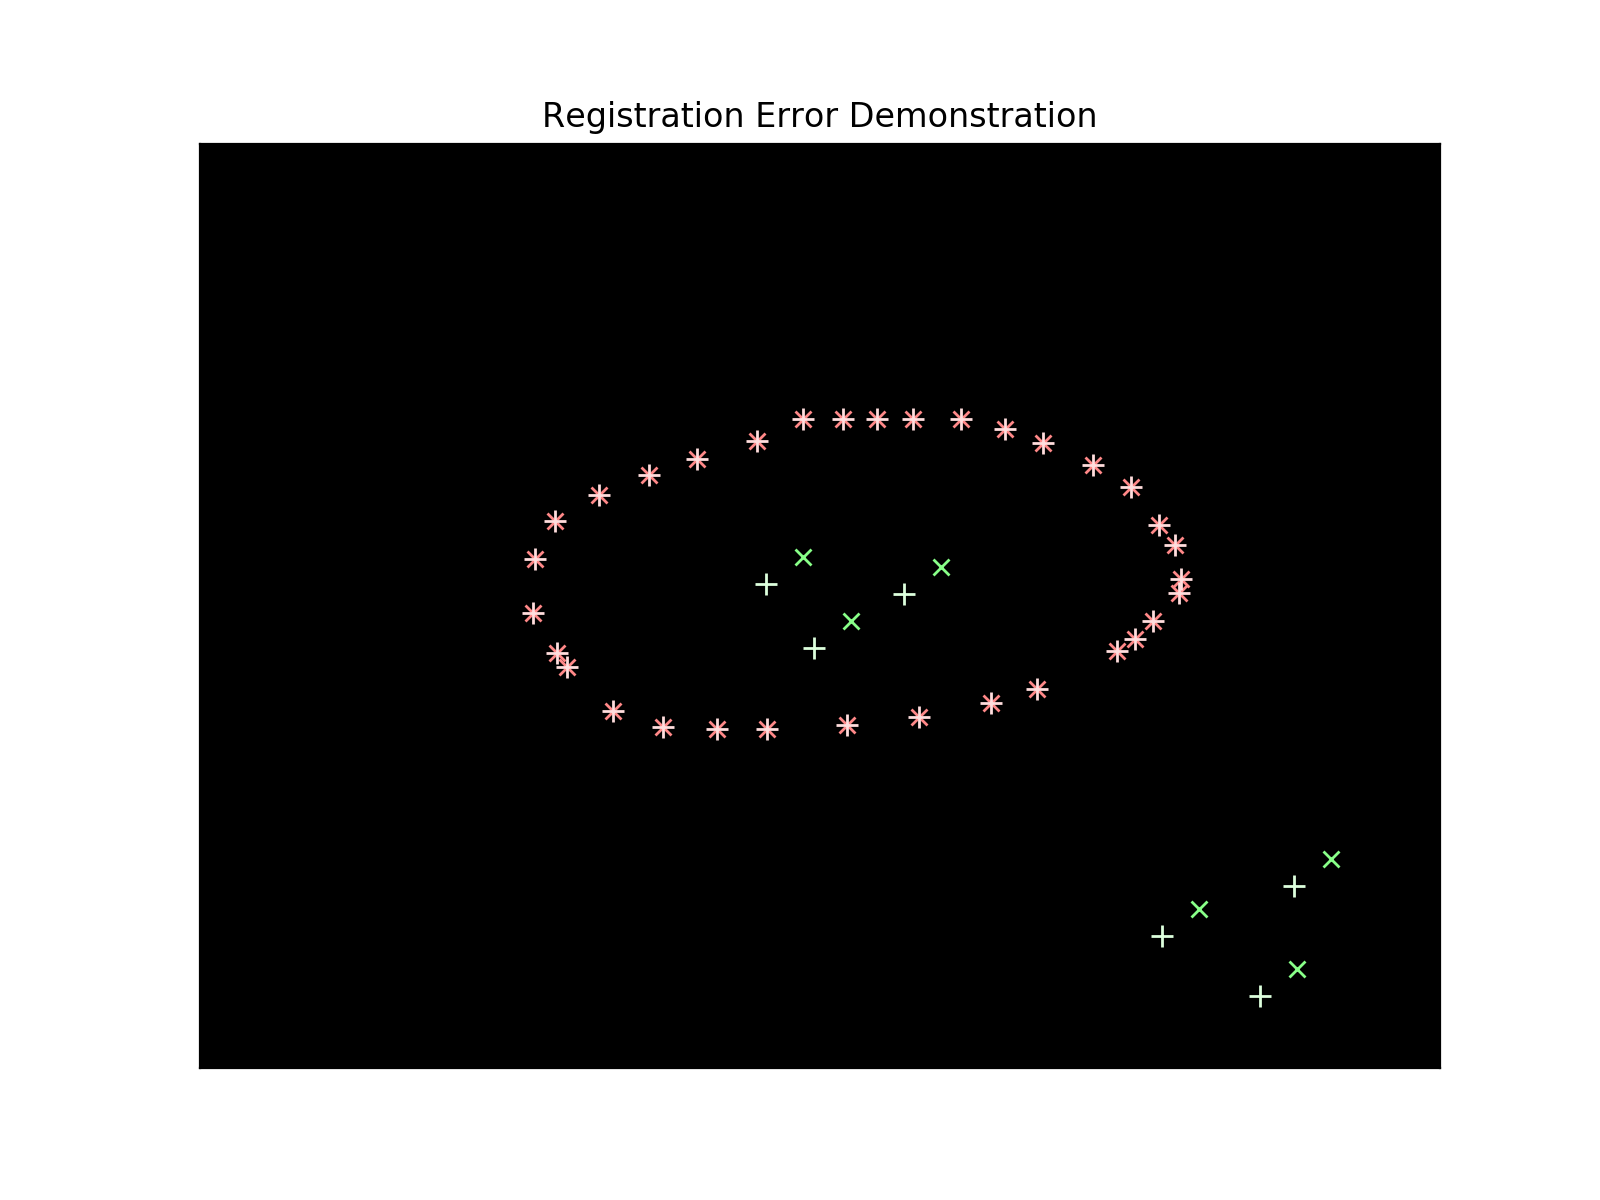

In [2]:
manipulation_interface = PairedPointDataManipulation(sitk.Euler2DTransform())
#If you want to set your own markers, feel free to clear or comment out the next two lines
manipulation_interface.set_fiducials(fixed_fiducials)
manipulation_interface.set_targets(fixed_targets)

### Statistics
After you click "register", run the next cell to view statistics on the errors of the most recent registration:

Mean FLE 4.242641	 STD FLE 0.000000	 Min FLE 4.242641	 Max FLE 4.242641
Mean FRE 0.000000	 STD FRE 0.000000	 Min FRE 0.000000	 Max FRE 0.000000
Mean TRE 4.242641	 STD TRE 0.000000	 Min TRE 4.242641	 Max TRE 4.242641


<IPython.core.display.Javascript object>


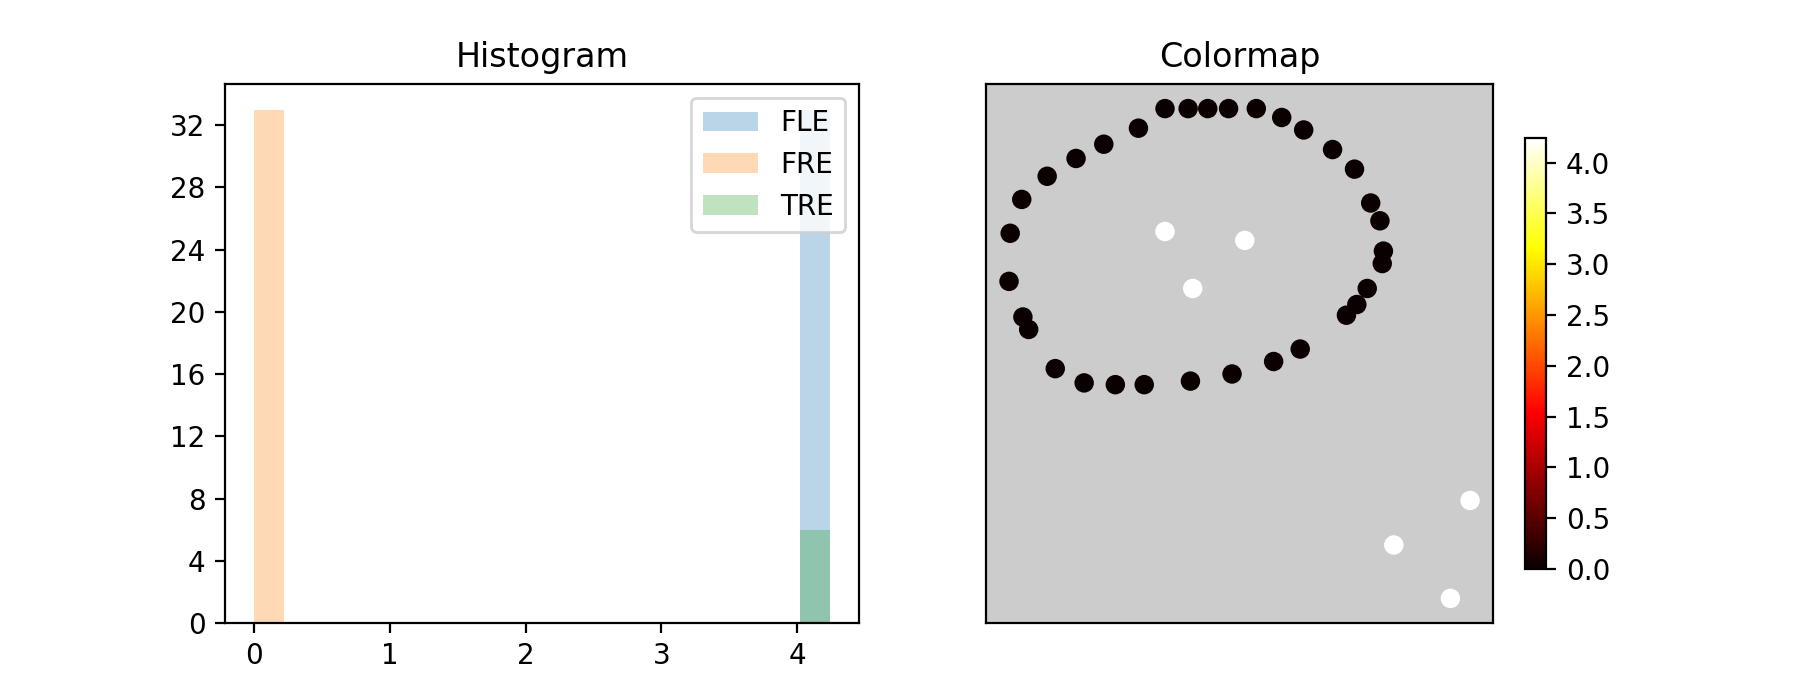

In [3]:
FLE_errors = manipulation_interface.FLE_errors
FRE_errors = manipulation_interface.FRE_errors
TRE_errors = manipulation_interface.TRE_errors
fixed_image = manipulation_interface.get_fixed_fiducials()+manipulation_interface.get_fixed_targets()

display_errors(fixed_image, FLE_errors, FRE_errors, TRE_errors)

### Affine Transformations
The next demonstration will present another registration issue. Users sometimes use an affine transformation rather than a rigid transformation in an attempt to further generalize the problem. However, an affine transformation will add a degree of freedom to the registration that does not necessarily match the reality. This is a phenomena called overfitting and can affect the target registration error. Compare the registration errors of the two:

In [4]:
fixed_fiducials = manipulation_interface.get_fixed_fiducials()
fiducials = manipulation_interface.get_original_fiducials()
fixed_targets = manipulation_interface.get_fixed_targets()
targets = manipulation_interface.get_original_targets()

fixed_image_points = [c for p in fixed_fiducials for c in p]
moving_image_points = [c for p in fiducials for c in p]

transform = sitk.LandmarkBasedTransformInitializer(sitk.AffineTransform(2), fixed_image_points, moving_image_points)

affine_FLE_errors = registration_errors(sitk.Transform(2, sitk.sitkIdentity), fixed_fiducials, fiducials)
affine_FRE_errors = registration_errors(transform, fixed_fiducials, fiducials)
affine_TRE_errors = registration_errors(transform, fixed_targets, targets)

min_err = min(FLE_errors[2], TRE_errors[2], affine_FLE_errors[2], affine_TRE_errors[2])
max_err = max(FLE_errors[3], TRE_errors[3], affine_FLE_errors[3], affine_TRE_errors[3])

Euler2DTransform
Mean FLE 4.242641	 STD FLE 0.000000	 Min FLE 4.242641	 Max FLE 4.242641
Mean FRE 0.000000	 STD FRE 0.000000	 Min FRE 0.000000	 Max FRE 0.000000
Mean TRE 4.242641	 STD TRE 0.000000	 Min TRE 4.242641	 Max TRE 4.242641


<IPython.core.display.Javascript object>


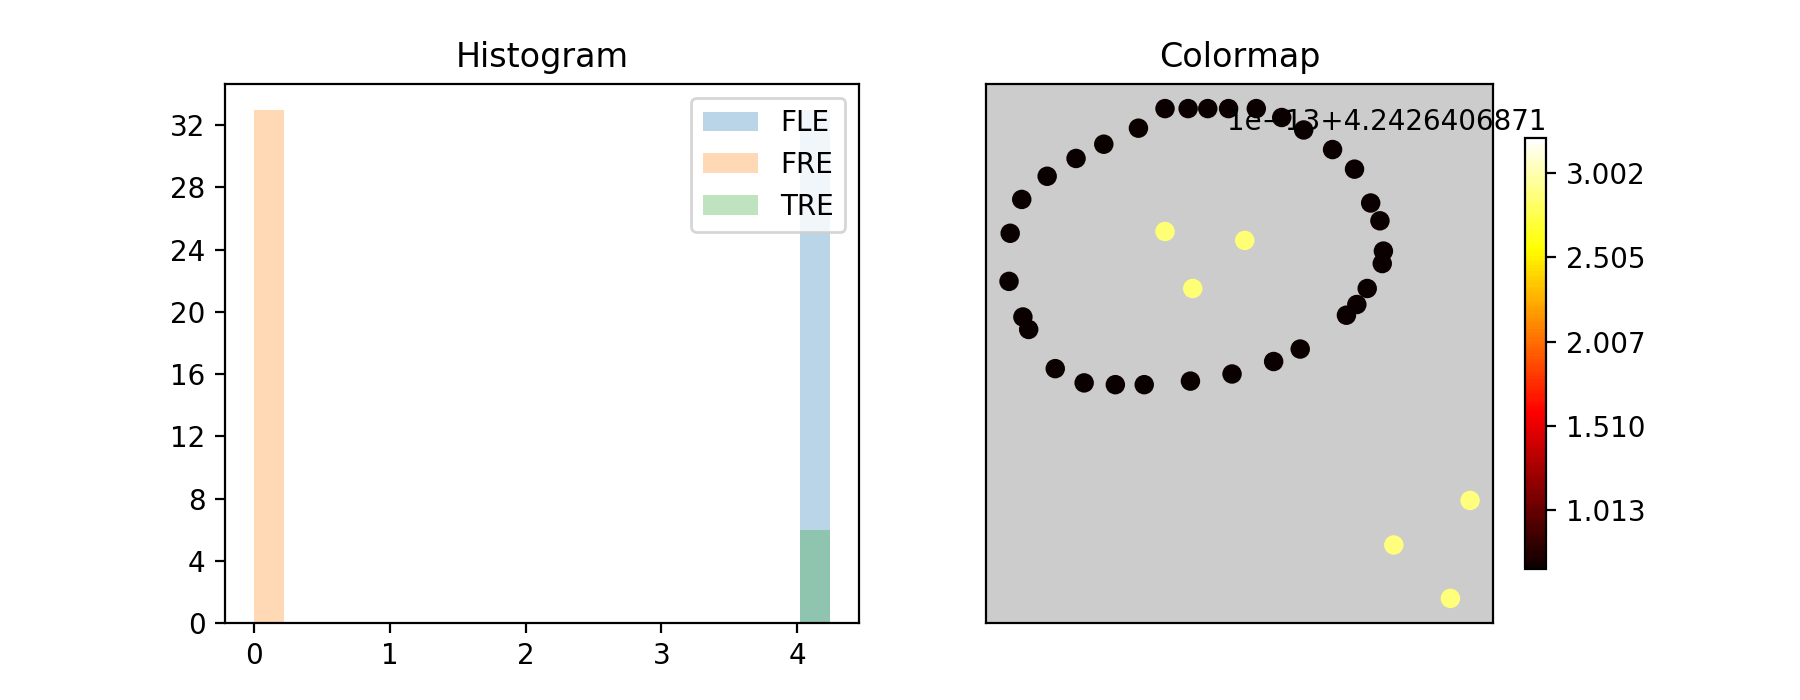


AffineTransform
Mean FLE 4.242641	 STD FLE 0.000000	 Min FLE 4.242641	 Max FLE 4.242641
Mean FRE 0.000000	 STD FRE 0.000000	 Min FRE 0.000000	 Max FRE 0.000000
Mean TRE 4.242641	 STD TRE 0.000000	 Min TRE 4.242641	 Max TRE 4.242641


<IPython.core.display.Javascript object>


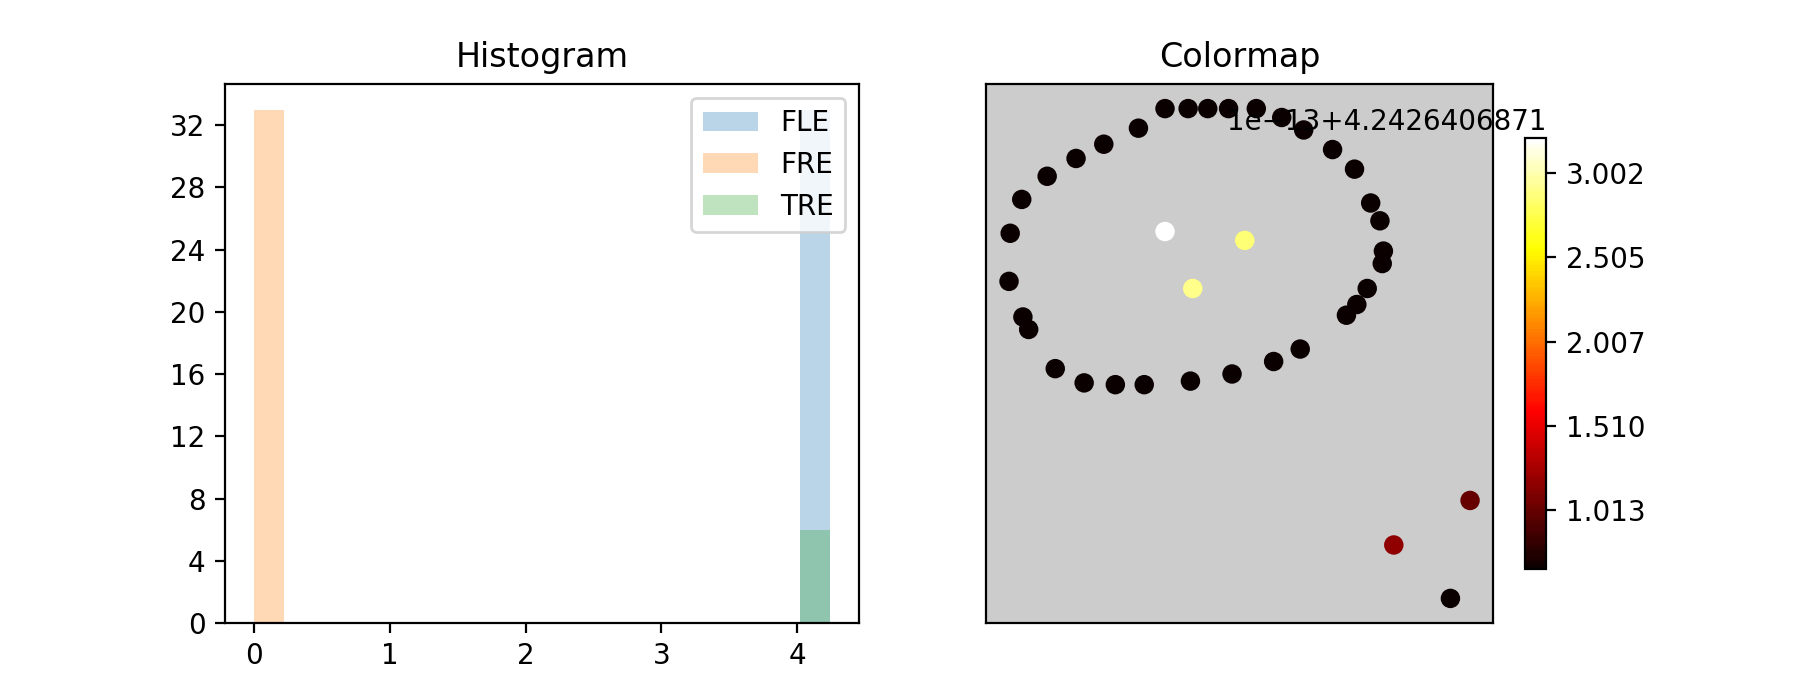

In [5]:
print("Euler2DTransform")
display_errors(fixed_image, FLE_errors, FRE_errors, TRE_errors,
               min_err=min_err, max_err=max_err, title="Euler2DTransform")

print("\nAffineTransform")
display_errors(fixed_image, affine_FLE_errors, affine_FRE_errors, affine_TRE_errors,
               min_err=min_err, max_err=max_err, title="AffineTransform")

Note the difference in fiducial registration errors and target registration errors using AffineTransform. It is important to ensure the transformation used for registration matches the situation of the images being registered.